In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus

## Read data from the database into pandas

In [2]:
# Creating a connection
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [4]:
# missing value analysis
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [5]:
# lets find the missing value of cntineous data
for features in df.columns:
    if df[features].dtypes==("float64","int64"):
        print(features,end=" column have missing value =")
        print(df[features].isnull().sum())

overall_rating column have missing value =836
potential column have missing value =836
crossing column have missing value =836
finishing column have missing value =836
heading_accuracy column have missing value =836
short_passing column have missing value =836
volleys column have missing value =2713
dribbling column have missing value =836
curve column have missing value =2713
free_kick_accuracy column have missing value =836
long_passing column have missing value =836
ball_control column have missing value =836
acceleration column have missing value =836
sprint_speed column have missing value =836
agility column have missing value =2713
reactions column have missing value =836
balance column have missing value =2713
shot_power column have missing value =836
jumping column have missing value =2713
stamina column have missing value =836
strength column have missing value =836
long_shots column have missing value =836
aggression column have missing value =836
interceptions column have mi

In [6]:
# lets do same for categorical data
for features1 in df.columns:
    if df[features1].dtypes== ("object"):
        print(features1,end=" columns having missing values =")
        print(df[features1].isnull().sum())

date columns having missing values =0
preferred_foot columns having missing values =836
attacking_work_rate columns having missing values =3230
defensive_work_rate columns having missing values =836


In [7]:
# Imputing the Missing values in Continuous data
for features in df.columns:
    if df[features].dtypes == ("float64","int64"):
        df[features].fillna(df[features].mean(),inplace=True)

In [8]:
df.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle     

In [9]:
df["preferred_foot"].unique()

array(['right', 'left', None], dtype=object)

In [10]:
#Now we will Convert None values in Nan values
df["preferred_foot"].replace([None],np.nan,inplace=True)
df["preferred_foot"].unique()

array(['right', 'left', nan], dtype=object)

In [11]:
# finding the Missing values in Categorical data
from sklearn.impute import SimpleImputer
sc = SimpleImputer(strategy="most_frequent")
df["preferred_foot"] = sc.fit_transform(df[["preferred_foot"]])

In [12]:
df["attacking_work_rate"].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [13]:
df["attacking_work_rate"].replace([None],np.nan,inplace =True)

df["attacking_work_rate"].replace("None" ,np.nan,inplace=True)

df["attacking_work_rate"].isna().sum()

6869

In [14]:
df["defensive_work_rate"].replace([None],np.nan,inplace=True)
df["defensive_work_rate"].isna().sum()

836

In [15]:
df["attacking_work_rate"] = sc.fit_transform(df[["attacking_work_rate"]])
df["defensive_work_rate"] = sc.fit_transform(df[["attacking_work_rate"]])

In [16]:
df.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [17]:
df.drop(["date"], 1, inplace=True)

In [18]:
# lets segrete data into cat and cont
cont_data = df.select_dtypes(["int64","float64"])
cat_data = df.select_dtypes("object")

In [19]:
cont_data.shape, cat_data.shape

((183978, 38), (183978, 3))

In [20]:
# 1 hot encoding where we will use Label Encoding For Categorical Variable.
from sklearn import preprocessing
lc = preprocessing.LabelEncoder()
for feature in cat_data.columns:
    cat_data[feature]=lc.fit_transform(cat_data[feature])
    

C:\Users\Satya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
cat_data.head(10)

,preferred_foot,attacking_work_rate,defensive_work_rate
0,1,3,3
1,1,3,3
2,1,3,3
3,1,3,3
4,1,3,3
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [22]:
# now we combine both data toghether
combined_data=pd.concat([cont_data,cat_data],1)
combined_data.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,3,3
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,3,3
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,3,3
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,3,3
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,3,3


In [23]:
# Now we create the X and Y variable
x = combined_data.drop(["overall_rating"],1)
y = combined_data["overall_rating"]

In [24]:
x.shape, y.shape

((183978, 40), (183978,))

In [25]:
# now we will split the data using train_tesst_split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=155)

C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
x_train.shape ,x_test.shape , y_train.shape , y_test.shape

((128784, 40), (55194, 40), (128784,), (55194,))

In [27]:
# Predicting using LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_pred = lr.predict(x_test)
y_pred

array([59.38009739, 66.19291117, 67.96945458, ..., 63.24310791,
       71.39293078, 73.35403791])

In [29]:
from sklearn.metrics import r2_score
Score = r2_score(y_test,y_pred)
Score

0.8584236272759032

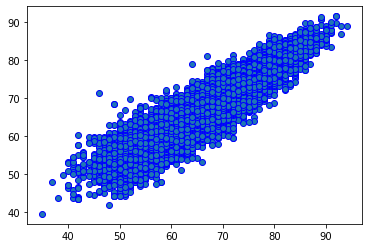

In [30]:
plt.scatter(x=y_test,y=y_pred,edgecolors="blue")
#plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

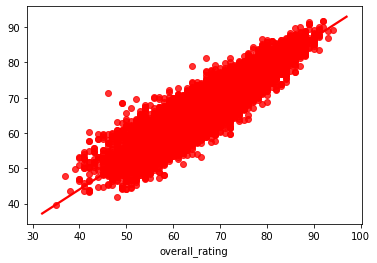

In [31]:
sns.regplot(y_test, y_pred, data=combined_data, fit_reg=True,color="red") 

In [32]:
# lets use DecisionTree
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
y_pred1 =dt.predict(x_test)
accuracy_score = r2_score(y_test,y_pred1)
accuracy_score

0.9569867050413475

In [34]:
# lets do hyperparametr tuning
grid_para = {"criteria":["mse"]}

In [35]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=dt,param_grid=grid_para,cv=10,n_jobs=1)
gridsearch.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'criteria': ['mse']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)>

In [36]:
dt2 = DecisionTreeRegressor(criterion='mse', 
                            max_depth=None,
                            max_features=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None,
                            splitter='best')

In [37]:
dt2.fit(x_train,y_train)
y_pred2 = dt2.predict(x_test)

In [38]:
accuracy_score2 = r2_score(y_test,y_pred2)
accuracy_score2

0.9570523207764844

In [39]:
# Lets use random forest to predict the best model to find the good accuracy
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
y_pred3 = rf.predict(x_test)
accuracy4 = r2_score(y_test,y_pred3)
accuracy4

0.9768933641784715